<a href="https://colab.research.google.com/github/wesleyConceicao/Processo_seletivo-UFRJ-Analytica/blob/main/UFRJ_Analytica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('./dataset_cancer.csv', sep = ";", decimal=",",index_col= 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4018 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4018 non-null   float64
 10  Estrogen Status         4024 non-null   int64  
 11  Progesterone Status     4024 non-null   int64  
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [4]:
df.dropna(inplace = True)

In [5]:
for col in df.columns:
    print(col)
    print(df[col].count())

Age
4012
Race
4012
Marital Status
4012
T Stage
4012
N Stage
4012
6th Stage
4012
differentiate
4012
Grade
4012
A Stage
4012
Tumor Size
4012
Estrogen Status
4012
Progesterone Status
4012
Regional Node Examined
4012
Reginol Node Positive
4012
Survival Months
4012
Status
4012


In [6]:
df.columns = [col.lower() for col in df.columns]

In [7]:
df['differentiate']= df['differentiate'].apply(lambda x:x.replace("differentiated", ""))
# df['differentiate']= df['differentiate'].apply(lambda x:x.join("differentiated").split(""))

In [8]:
df["age"] = df["age"].astype(int)
df["tumor size"] = df["tumor size"].astype(int)

In [9]:
df.rename(columns= {"reginol node positive" :"regional node positive", "survival months":"survival Days"}, inplace = True)

In [10]:
df.head(1)

,age,race,marital status,t stage,n stage,6th stage,differentiate,grade,a stage,tumor size,estrogen status,progesterone status,regional node examined,regional node positive,survival Days,status
0,68,White,Married,T1,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,0


## Analise exploratória dos dados 



In [11]:
import matplotlib.pyplot as plt 
import seaborn as sbn 

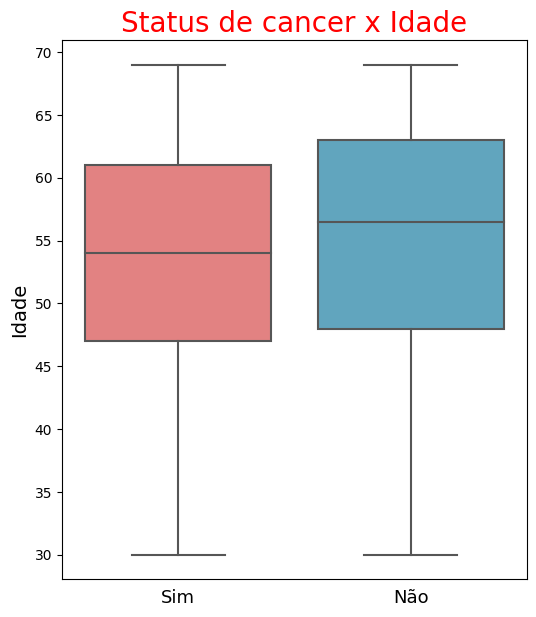

In [12]:
# Analise comparativa de mulheres com cancer  por idade 
plt.figure(figsize=(6, 7))
sbn.boxplot(data=df, x='status', y='age', palette=sbn.color_palette(['#F27272', '#51ACCE']))
plt.title('Status de cancer x Idade', color='red', fontsize=20)
plt.xlabel(None)
plt.ylabel('Idade', fontsize=14)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Sim', 'Não'], fontsize=13);

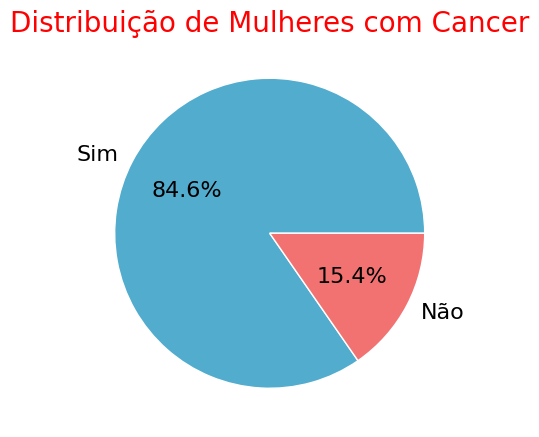

In [13]:
# Distribuição de pessoas com cancer  
fig, ax = plt.subplots(figsize=(5, 7))
ax.pie(
    df.status.value_counts().values, labels=['Sim', 'Não'], autopct='%1.1f%%',
    startangle=0, textprops={'fontsize': 16}, wedgeprops={'edgecolor': '#fff'}, colors=['#51ACCE', '#F27272']
)
ax.set_title('Distribuição de Mulheres com Cancer', fontsize=20, color='red')
plt.show()

<Axes: title={'center': 'Distribuição de mulheres por raça'}, ylabel='race'>

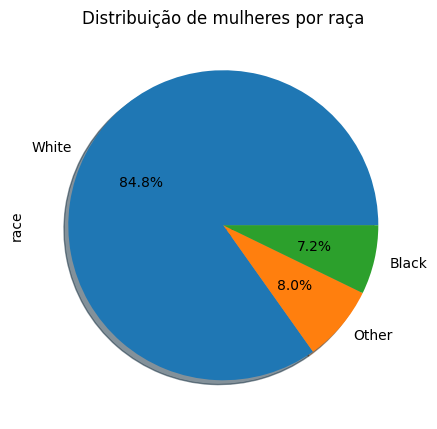

In [14]:
distribuicao_raca = round(df["race"].value_counts(normalize=True)*100,2)
distribuicao_raca.plot(kind='pie', figsize=(5,25),autopct = '%0.01f%%', shadow=True, title='Distribuição de mulheres por raça')

<Axes: xlabel='survival Days', ylabel='Count'>

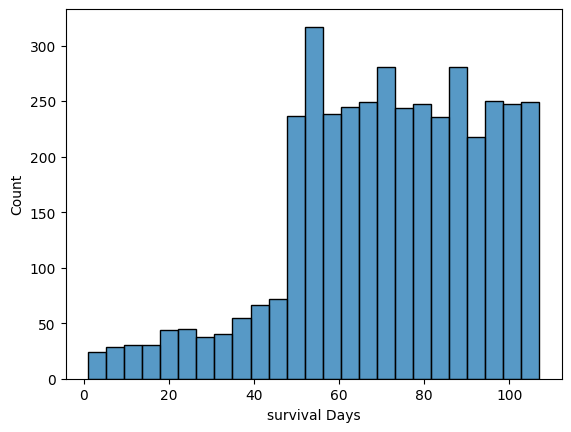

In [17]:
sbn.histplot(df, x="survival Days")

<Axes: xlabel='survival Days', ylabel='Count'>

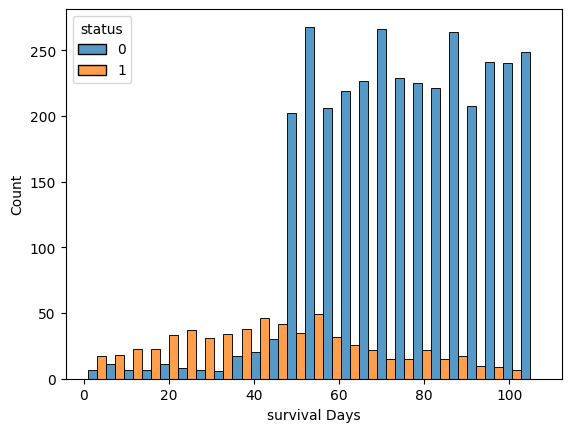

In [18]:
sbn.histplot(df, x="survival Days", hue="status", multiple = "dodge")

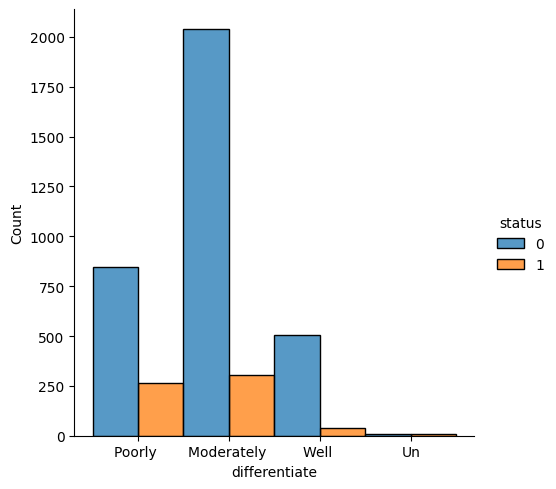

In [20]:
sbn.displot(df, x= "differentiate", hue= "status", multiple = "dodge")

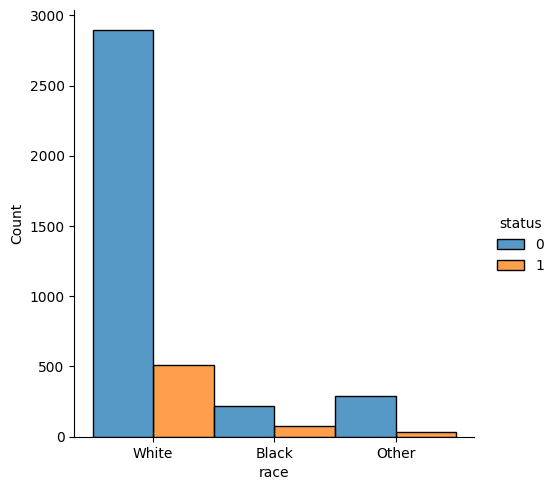

In [21]:
sbn.displot(df, x="race", hue="status", multiple = "dodge")

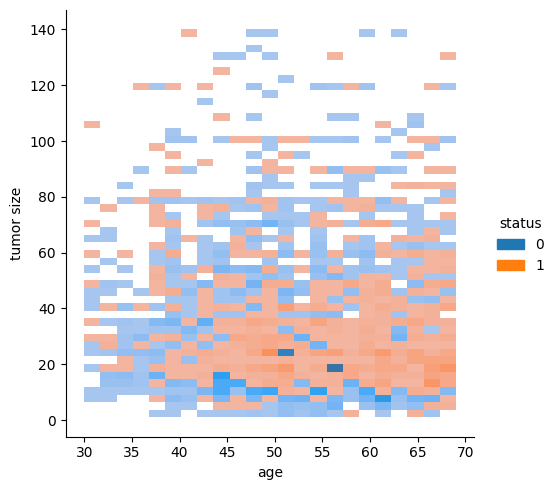

In [23]:
sbn.displot(df, x="age", y="tumor size", hue="status")

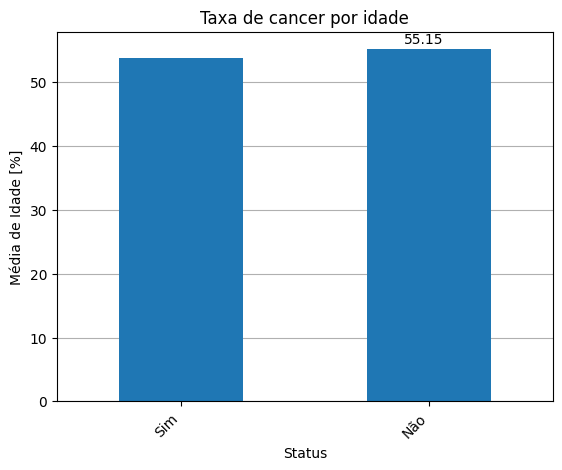

In [26]:
# Taxa de Cancer por idade 
ax = df.groupby(by=['status'])['age']\
    .mean()\
    .multiply(1)\
    .plot.bar(title='Taxa de cancer por idade')
    
plt.ylabel('Média de Idade [%]')
plt.xlabel('Status')
plt.xticks([0,1],['Sim','Não'], rotation= 45, ha='right')
ax.set_axisbelow(True)
plt.grid(axis='y')

x_offset = -.1
y_offset = 0.9

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)
    
ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()